## General infomation about the dataset
1. Country column showing about 183 countries uniquely
2. Years in which deaths happened
3. Number of under-five deaths (thousands)4. Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).1 Both persons
4. Number of under-five deaths (thousands).16. Neonatal mortality rate (per 1000 live births) - babies dying within 25 days of birth - Males
5. Number of under-five deaths (thousands).2 - Females
6. Number of infant deaths (thousands) - Both genders
7. Number of infant deaths (thousands).1 - Male	
8. Number of infant deaths (thousands).2 - Female
9. Number of neonatal deaths (thousands): Babies dying in first 28 days of birth - both genders

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
death_data = pd.read_csv("Datasets/Number of deaths (thousands).csv")
death_data.head()

,Unnamed: 0,Unnamed: 1,Number of under-five deaths (thousands),Number of under-five deaths (thousands).1,Number of under-five deaths (thousands).2,Number of infant deaths (thousands),Number of infant deaths (thousands).1,Number of infant deaths (thousands).2,Number of neonatal deaths (thousands)
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes
1,Afghanistan,2018,74278,40312,33966,57182,31394,25788,44725
2,Afghanistan,2017,76877,41631,35246,58846,32244,26602,45771
3,Afghanistan,2016,79770,43134,36636,60673,33222,27451,46963
4,Afghanistan,2015,82918,44733,38185,62652,34257,28395,48237


In [3]:
death_data.rename(columns={'Unnamed: 0':'Country', "Unnamed: 1":"Year"}, inplace=True)

In [4]:
death_data.rename(columns =
                  {
                      "Number of under-five deaths (thousands)":"Both genders (Adults)",
                      "Number of under-five deaths (thousands).1":"Male adults",
                      "Number of under-five deaths (thousands).2":"Female adults",
                      "Number of infant deaths (thousands)":"Both genders (infants)",
                      "Number of infant deaths (thousands).1":"Male infants",
                      "Number of infant deaths (thousands).2":"Female infants",
                      "Number of neonatal deaths (thousands)":"neonatal_death"         

                  },inplace = True)

## Removing the first row of the dataset containing invalid columns

In [5]:
death_data = death_data.iloc[1: , :] 
death_data.head()

,Country,Year,Both genders (Adults),Male adults,Female adults,Both genders (infants),Male infants,Female infants,neonatal_death
1,Afghanistan,2018,74278,40312,33966,57182,31394,25788,44725
2,Afghanistan,2017,76877,41631,35246,58846,32244,26602,45771
3,Afghanistan,2016,79770,43134,36636,60673,33222,27451,46963
4,Afghanistan,2015,82918,44733,38185,62652,34257,28395,48237
5,Afghanistan,2014,86378,46509,39869,64808,35410,29398,49715


In [6]:
death_data.tail()

,Country,Year,Both genders (Adults),Male adults,Female adults,Both genders (infants),Male infants,Female infants,neonatal_death
1160,Zimbabwe,2017,22519,12419,10100,16015,9010,7005,9696
1161,Zimbabwe,2016,23326,12867,10459,16693,9396,7297,10235
1162,Zimbabwe,2015,25433,14001,11432,18006,10121,7885,10815
1163,Zimbabwe,2014,27058,14866,12192,19051,10707,8344,11447
1164,Zimbabwe,2013,29200,15984,13216,20265,11363,8902,12063


In [7]:
death_data.isna().sum()

Country                   0
Year                      0
Both genders (Adults)     0
Male adults               0
Female adults             0
Both genders (infants)    0
Male infants              0
Female infants            0
neonatal_death            0
dtype: int64

In [8]:
death_data.columns

Index(['Country', 'Year', 'Both genders (Adults)', 'Male adults',
       'Female adults', 'Both genders (infants)', 'Male infants',
       'Female infants', 'neonatal_death'],
      dtype='object')

In [9]:
death_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 1 to 1164
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 1164 non-null   object
 1   Year                    1164 non-null   object
 2   Both genders (Adults)   1164 non-null   object
 3   Male adults             1164 non-null   object
 4   Female adults           1164 non-null   object
 5   Both genders (infants)  1164 non-null   object
 6   Male infants            1164 non-null   object
 7   Female infants          1164 non-null   object
 8   neonatal_death          1164 non-null   object
dtypes: object(9)
memory usage: 82.0+ KB


In [10]:
def convert_to_int(data, column):
    data[column] = data[column].astype("int64")

In [11]:
num_columns = ['Year', 'Both genders (Adults)', 'Male adults', 'Female adults', 'Both genders (infants)', 'Male infants',
       'Female infants', 'neonatal_death'
]

In [12]:
for column in num_columns:
    convert_to_int(death_data, column)

In [13]:
death_data.dtypes

Country                   object
Year                       int64
Both genders (Adults)      int64
Male adults                int64
Female adults              int64
Both genders (infants)     int64
Male infants               int64
Female infants             int64
neonatal_death             int64
dtype: object

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Both genders (Adults)'}>,
        <AxesSubplot:title={'center':'Male adults'}>],
       [<AxesSubplot:title={'center':'Female adults'}>,
        <AxesSubplot:title={'center':'Both genders (infants)'}>,
        <AxesSubplot:title={'center':'Male infants'}>],
       [<AxesSubplot:title={'center':'Female infants'}>,
        <AxesSubplot:title={'center':'neonatal_death'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 1080x432 with 0 Axes>

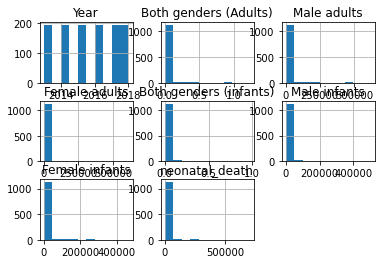

In [14]:
plt.figure(figsize = (15, 6))
death_data.hist()

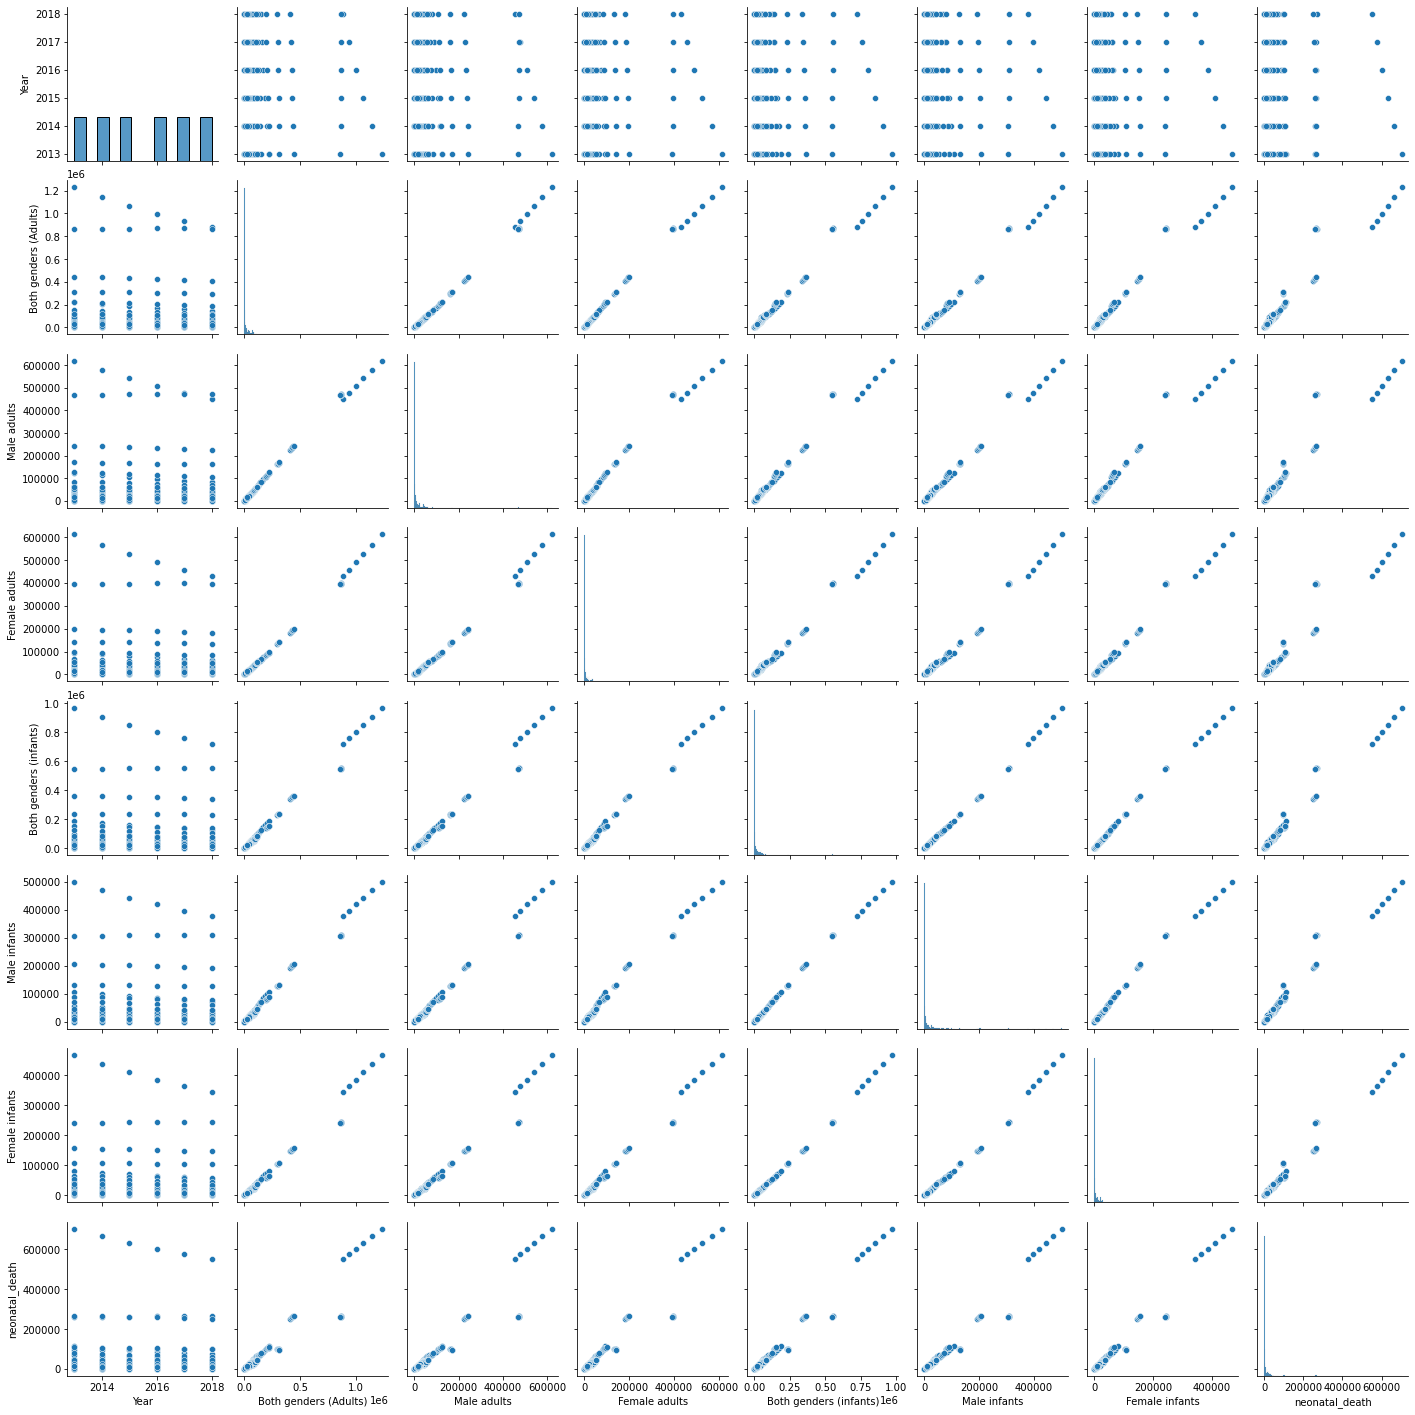

In [15]:
sns.pairplot(death_data)

In [16]:
correlation = death_data.corr()

<AxesSubplot:>

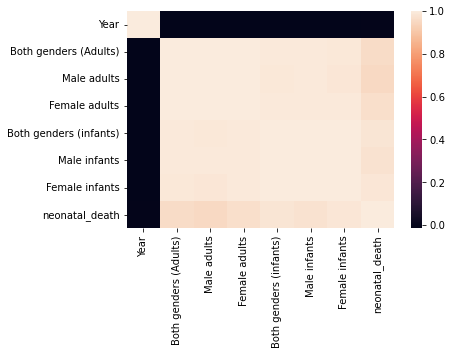

In [17]:
sns.heatmap(correlation)

### Conclusion: 
#### Variables are highly co-related. Thus, we can use either 'Both genders (Adults)' and 'Both genders (infants)' out of all the variables to train our model. This will avoid the overfitting of the model and a food accuracy score is possible.

In [18]:
from pandas_profiling import ProfileReport

In [19]:
death_report = ProfileReport(
    death_data,
    title="Total Morality EDA report"         
)
death_report.to_notebook_iframe()


In [66]:
death_report.to_file("Total Morality EDA report.html")

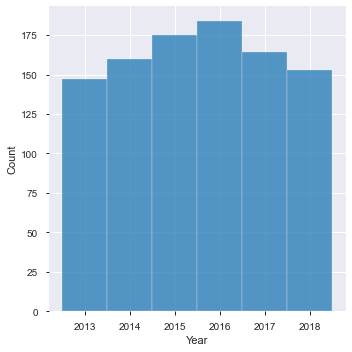

In [20]:
sns.displot(death_data.groupby(['Both genders (Adults)'])['Year'].mean(), discrete = True)

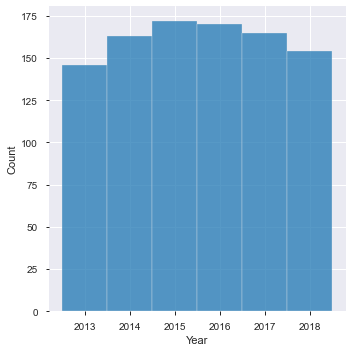

In [21]:
sns.displot(death_data.groupby(['Both genders (infants)'])['Year'].mean(), discrete = True)

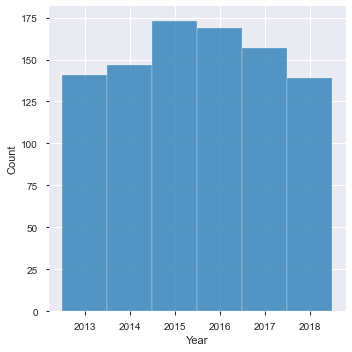

In [22]:
sns.displot(death_data.groupby(['Male adults'])['Year'].mean(), discrete = True)

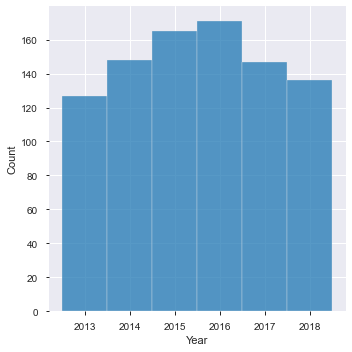

In [23]:
sns.displot(death_data.groupby(['Female adults'])['Year'].mean(), discrete = True)

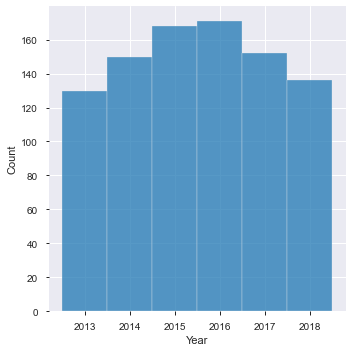

In [24]:
sns.displot(death_data.groupby(['Male infants'])['Year'].mean(), discrete = True)

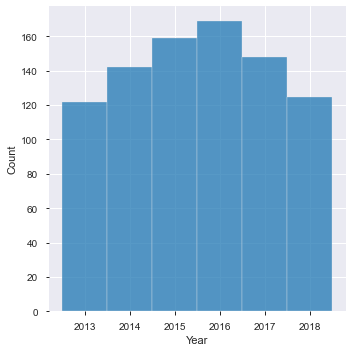

In [25]:
sns.displot(death_data.groupby(['Female infants'])['Year'].mean(), discrete = True)

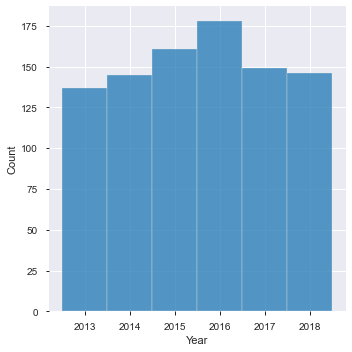

In [26]:
sns.displot(death_data.groupby(['neonatal_death'])['Year'].mean(), discrete = True)

In [27]:
def plot_outliers(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)

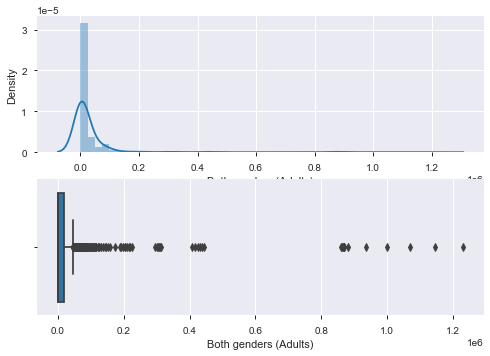

In [28]:
plot_outliers(death_data, "Both genders (Adults)")

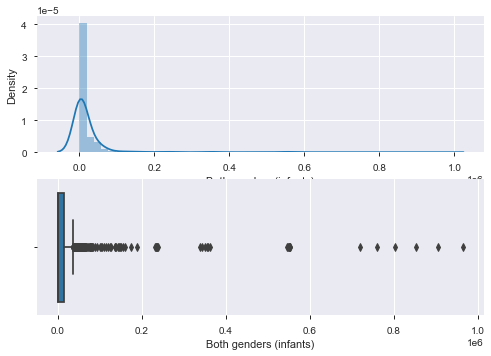

In [29]:
plot_outliers(death_data, "Both genders (infants)")

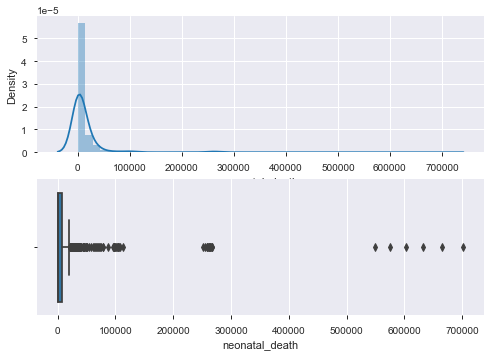

In [30]:
plot_outliers(death_data, "neonatal_death")

In [31]:
death_data['neonatal_death'] = np.where(death_data['neonatal_death'] >= 100000, death_data["neonatal_death"].median(), death_data["neonatal_death"])

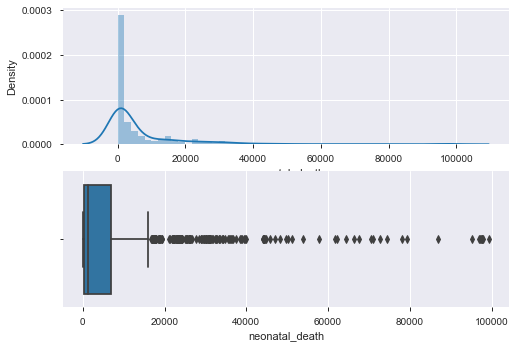

In [32]:
plot_outliers(death_data, "neonatal_death")

## Visualization results
1. The Variables that we use to visualize are much similar.
2. Thus to prepare a ML model out of these we can take either ofthe two columns as they are highly co-related through the heatmap.

In [33]:
categorical = [col for col in death_data.columns if death_data[col].dtype == 'O']

In [34]:
categorical

['Country']

In [35]:
countries = death_data[categorical]

In [36]:
countries

,Country
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
...,...
1160,Zimbabwe
1161,Zimbabwe
1162,Zimbabwe
1163,Zimbabwe


In [37]:
countries = pd.get_dummies(countries, drop_first = True)

In [38]:
countries

,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
death_data.drop('Country', axis = 1, inplace = True)

In [40]:
death_data.head()

,Year,Both genders (Adults),Male adults,Female adults,Both genders (infants),Male infants,Female infants,neonatal_death
1,2018,74278,40312,33966,57182,31394,25788,44725.0
2,2017,76877,41631,35246,58846,32244,26602,45771.0
3,2016,79770,43134,36636,60673,33222,27451,46963.0
4,2015,82918,44733,38185,62652,34257,28395,48237.0
5,2014,86378,46509,39869,64808,35410,29398,49715.0


In [41]:
data_list = [countries, death_data]
new_data = pd.concat(data_list, axis = 1)

In [42]:
new_data.head()

,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Country_Zambia,Country_Zimbabwe,Year,Both genders (Adults),Male adults,Female adults,Both genders (infants),Male infants,Female infants,neonatal_death
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2018,74278,40312,33966,57182,31394,25788,44725.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2017,76877,41631,35246,58846,32244,26602,45771.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2016,79770,43134,36636,60673,33222,27451,46963.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2015,82918,44733,38185,62652,34257,28395,48237.0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2014,86378,46509,39869,64808,35410,29398,49715.0


In [43]:
new_data.drop('Both genders (Adults)', axis = 1, inplace = True)
new_data.drop('Male adults', axis = 1, inplace = True)
new_data.drop('Female adults', axis = 1, inplace = True)
new_data.drop('Both genders (infants)', axis = 1, inplace = True)
new_data.drop('Male infants', axis = 1, inplace = True)
new_data.drop('Female infants', axis = 1, inplace = True)
new_data.drop('neonatal_death', axis = 1, inplace = True)

In [44]:
new_data.head()

,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Year
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2014


In [45]:
y1 = death_data['Both genders (Adults)']
y2  = death_data['neonatal_death']

In [46]:
y3 = death_data['Both genders (infants)']

In [47]:
X = new_data
X.shape

(1164, 194)

In [48]:
from sklearn.model_selection import train_test_split

## Implementing ML algorithms on (Both genders (Adults)) variable

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [51]:
from sklearn import metrics
import pickle

In [52]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_1.pkl",'wb')
        pickle.dump(model,file)
    

Training score : 0.9939968811862641
predictions are: 
 [ 3.21908262e+04  7.21634414e+04  8.96289670e+02  5.88333333e+02
  1.02727421e+05 -7.25756922e+02  1.26605289e+03  2.45166786e+04
  7.45337380e+03  3.45685978e+03  1.37192141e+03  1.11087426e+05
  8.41878621e+04  2.29720234e+03  3.94329659e+03  2.92037700e+03
  1.85015214e+04  2.10194299e+04 -1.23932141e+03  1.35518450e+03
  7.87826052e+04  2.48807738e+04 -1.61566901e+03 -7.51623003e+02
  1.17353967e+03 -1.27672141e+03 -1.09475692e+03  1.37072141e+03
 -9.44362087e+02  1.32802620e+03  2.34436209e+03  5.42377380e+03
  7.84623003e+02  5.88412712e+04  7.57384786e+04  2.30746901e+03
  4.17822417e+02  4.30644835e+02  2.54410579e+03  8.43387242e+04
  2.06170369e+05  2.91275258e+04  2.66443912e+03  5.09763223e+02
  7.82557934e+03  1.18593450e+03  6.53679659e+03  3.04926901e+03
  1.31136209e+03  7.43792066e+03  1.88559750e+05  2.33333333e+00
  8.50598690e+04  2.27353568e+03  8.27910000e+04  1.35462690e+04
  6.72557214e+04  3.74105165e+02  2

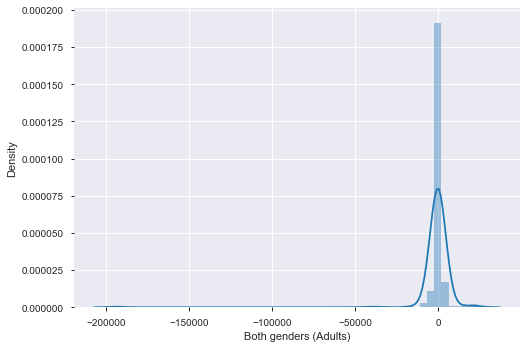

In [53]:
predict(LinearRegression(), 0)

Training score : 1.0
predictions are: 
 [3.351000e+04 7.434500e+04 8.291800e+04 7.977000e+04 1.008340e+05
 1.000000e+01 2.770000e+02 2.506700e+04 7.404000e+03 3.052000e+03
 1.200000e+01 1.123450e+05 9.300600e+04 3.100000e+01 1.935000e+03
 3.715000e+03 2.010500e+04 1.983400e+04 1.000000e+01 2.400000e+02
 7.666100e+04 2.463800e+04 7.427800e+04 1.000000e+01 4.130000e+02
 1.000000e+01 1.000000e+01 1.100000e+01 1.000000e+01 1.823000e+03
 1.510000e+03 5.105000e+03 3.100000e+01 5.852500e+04 7.661900e+04
 4.000000e+01 2.390000e+02 5.600000e+01 5.950000e+02 8.592800e+04
 2.177820e+05 2.869100e+04 6.900000e+02 2.530000e+02 6.795000e+03
 5.900000e+01 5.049000e+03 7.930000e+02 4.080000e+02 7.839000e+03
 2.031360e+05 2.000000e+00 8.577100e+04 5.000000e+00 8.432100e+04
 1.159800e+04 7.346600e+04 7.940000e+02 6.640000e+02 1.600000e+01
 5.540000e+02 3.620000e+03 8.291800e+04 3.851000e+03 6.240000e+02
 2.354800e+04 1.000000e+01 1.097800e+04 7.427800e+04 3.205000e+03
 3.715000e+03 4.255410e+05 1.000000e

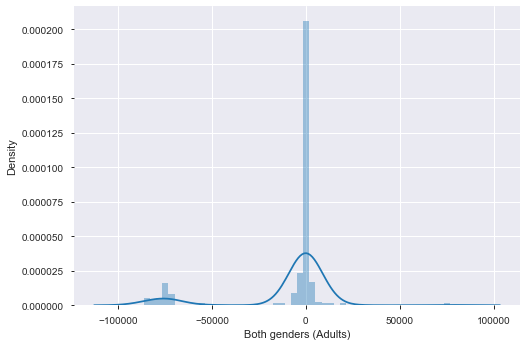

In [54]:
predict(DecisionTreeRegressor(), 1)

Training score : 0.9846698577197335
predictions are: 
 [3.24508200e+04 7.16478700e+04 5.64046100e+04 4.80165100e+04
 9.89382600e+04 2.99530000e+02 4.75684300e+04 2.44259200e+04
 2.14401000e+04 4.81621700e+04 3.28343200e+04 1.08944030e+05
 8.97635300e+04 5.13671000e+04 5.25723900e+04 4.60218200e+04
 2.07074000e+04 2.01347100e+04 8.58900000e+01 3.81006200e+04
 7.64544500e+04 2.58781700e+04 4.25265400e+04 3.80600000e+01
 5.47891900e+04 7.02600000e+01 1.33310000e+02 3.71526500e+04
 4.00700000e+01 3.90294900e+04 4.36648000e+04 3.96184900e+04
 4.47864800e+04 5.87159100e+04 7.63830500e+04 4.23629900e+04
 3.90523100e+04 4.64513500e+04 4.96600100e+04 8.20268300e+04
 2.12374150e+05 2.87629400e+04 4.96705700e+04 4.98103600e+04
 4.09372900e+04 3.71656800e+04 4.63085900e+04 5.14497800e+04
 4.73743000e+04 6.90903000e+03 1.94666690e+05 4.80960900e+04
 8.28316500e+04 4.50571500e+04 8.26348800e+04 1.56711900e+04
 7.03806200e+04 4.25475600e+04 4.42729400e+04 3.67027900e+04
 4.84926500e+04 4.84768900e+04

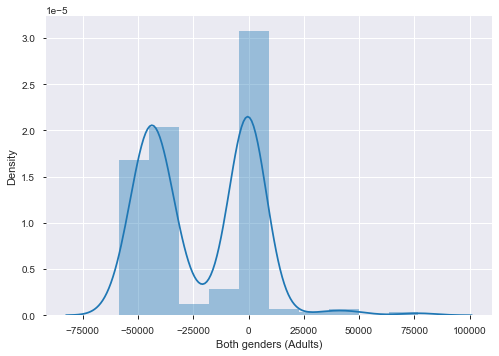

In [55]:
predict(RandomForestRegressor(), 0)

## Implementing ML algotithms on (Neonatal deaths) variable

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.2)

In [57]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_2.pkl",'wb')
        pickle.dump(model,file)
    

Training score : 0.9429439026519764
predictions are: 
 [ 9.02125394e+01  5.39349982e+02  5.59087496e+02  1.52901254e+03
  1.93656217e+02  5.02724251e+03  3.67275236e+01  7.64156217e+02
  5.23318746e+03  2.97093783e+02  8.53666316e+01  4.77420604e+04
  6.78194125e+04  2.45400000e+03  8.95418704e+02  2.27574921e+01
  1.05507375e+04  2.07738746e+03  2.85872476e+02  9.75975749e+03
  4.77778161e+02  4.20357492e+02  2.11387248e+03  4.78210104e+04
  8.11583421e+01  6.82125394e+01  8.93770811e+02  1.03757492e+02
  2.32673500e+04  2.45441870e+03 -6.43312960e+01  7.31815622e+02
  1.03482250e+04  8.10187461e+02  1.03284875e+04  4.92349982e+02
  4.37874606e+01  2.40038746e+03  2.22833438e+04  2.63957492e+02
  2.13393730e+02  2.48671891e+02  4.77815354e+04  2.06093783e+02
  1.05557492e+02  2.33265625e+04  5.00214692e+03  2.31828792e+04
  3.17023275e+04  3.17727524e+02  1.88387461e+02  1.91868757e+02
  9.73192750e+04  2.72135749e+03  2.80425079e+01  7.06721839e+02
  6.04342189e+03  6.11687094e+04  8

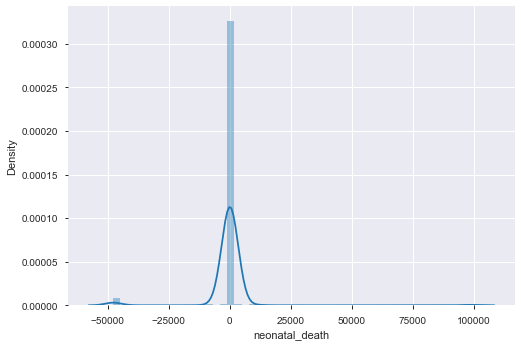

In [58]:
predict(LinearRegression(), 1)

Training score : 0.6731283555077225
predictions are: 
 [28181.88  27801.41  19888.25  33544.64  30538.09   6712.61  22375.78
 26929.75   8517.6   32853.56  26411.84  27468.41  72344.87  19837.97
 29986.88  23493.72  12481.28  26719.16  22056.25  10491.1   29807.01
 24081.17  23643.49  37393.88  28359.65  30224.44  24416.74  21641.37
 23982.32  27980.93  27733.09  26953.51  12528.43  26518.01  11299.75
 21652.41  25962.05  25555.09  23035.06  25901.74  19332.52  15519.99
 22675.55  28213.23  25858.98  24986.57  15084.47  24077.62  33529.24
 30410.    25535.45  16938.09  96708.75  18708.32  14962.51  27795.57
  9424.93  56576.93  31829.81  32311.53  31376.61  23283.37   6730.13
 36882.04  28580.75  26661.13  27771.15  15417.69  30416.36  37396.52
 28630.08  10572.12  31926.07  28068.69  35859.47  64121.87  22179.36
 28057.93  29841.36  38753.05  18545.71  30205.52   8669.8   14479.46
 21296.93  14769.82  15208.13  35352.03  28655.38  29545.33  23994.07
  5434.91  18739.01  23476.02  2507

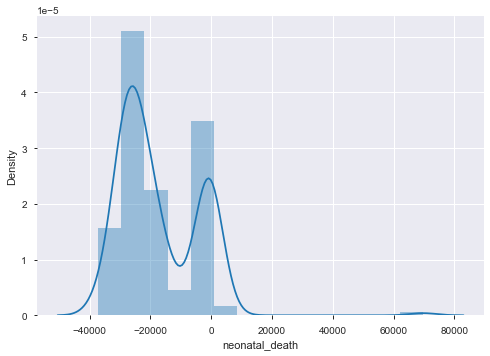

In [59]:
predict(RandomForestRegressor(), 0)

Training score : 1.0
predictions are: 
 [3.3000e+01 5.3100e+02 5.7500e+02 1.5620e+03 2.4300e+02 5.0570e+03
 2.0000e+00 7.0100e+02 5.2020e+03 2.7000e+02 1.2800e+02 4.5771e+04
 7.4423e+04 2.4210e+03 8.9100e+02 3.5000e+01 1.1657e+04 2.0510e+03
 3.0500e+02 9.8000e+03 4.6200e+02 4.3400e+02 2.2240e+03 5.1219e+04
 6.7000e+01 9.0000e+00 8.0700e+02 1.2000e+02 2.3287e+04 2.4770e+03
 4.0000e+00 7.3700e+02 1.2063e+04 8.4900e+02 1.0235e+04 5.1500e+02
 1.0100e+02 2.0440e+03 2.2130e+04 2.7900e+02 2.4300e+02 2.3700e+02
 4.8237e+04 1.6500e+02 1.1900e+02 2.3020e+04 5.2600e+03 2.2787e+04
 3.4037e+04 3.0900e+02 2.2000e+02 1.8700e+02 9.7922e+04 2.7830e+03
 1.9000e+01 7.0100e+02 6.7550e+03 5.7787e+04 4.5000e+01 2.3700e+02
 7.6400e+02 9.6000e+01 6.4210e+03 1.8000e+01 8.3500e+02 1.2960e+03
 2.6200e+02 1.4077e+04 2.4300e+02 2.7000e+02 6.8000e+01 3.9330e+03
 9.3100e+02 2.7410e+03 4.5000e+01 6.6316e+04 2.6080e+03 1.2680e+03
 4.8000e+01 3.8770e+04 7.6400e+02 3.0215e+04 6.8090e+03 1.5000e+01
 7.6300e+02 1.4056e+04

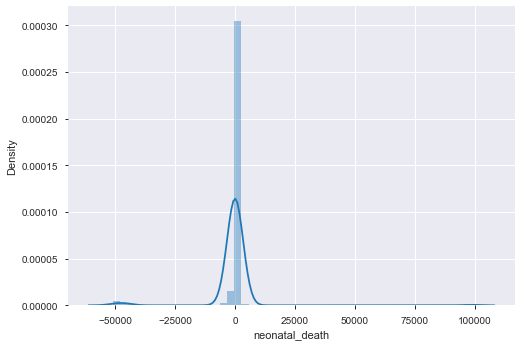

In [60]:
predict(DecisionTreeRegressor(), 0)

## Implementing ML algotithms on (Both genders (infants)) variable


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size = 0.2)

In [62]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_3.pkl",'wb')
        pickle.dump(model,file)
    

Training score : 0.9921097605833186
predictions are: 
 [ 3.51349205e+05  5.91250000e+02  5.03982611e+03  2.31689444e+02
 -2.64784166e+02  1.69392083e+03  1.07724892e+04  1.68758050e+04
  1.42652300e+03  2.78888261e+04  4.80930621e+04 -4.27469997e+02
 -2.51784166e+02 -6.55204995e+02 -1.78870500e+03  1.19810279e+04
  9.53943167e+03  2.43060500e+03  2.12641612e+03  5.45571594e+04
  1.62806833e+03  8.94036334e+03  4.91584050e+04  5.37359500e+03
  7.08079171e+02  5.38667083e+03  1.13952300e+03 -1.67389444e+03
  3.71317083e+03  1.56717083e+03  2.47944892e+04  8.23661708e+04
  8.06517392e+04  2.05000500e+03  8.02384100e+03  1.56880420e+02
  8.50000000e+00  5.95284166e+02  2.67684050e+04  2.41954208e+04
  2.36339230e+04  6.67835590e+04  2.22057230e+04  4.91893999e+03
  3.07889950e+04  2.00000000e+00  3.05611708e+04  3.63000171e+04
  1.45205356e+05  5.10920500e+03  2.05590010e+01  1.46777511e+05
  1.50392083e+03  4.88816410e+04  4.20842444e+03  2.67250000e+02
  1.11552300e+03  4.83711822e+04 -1

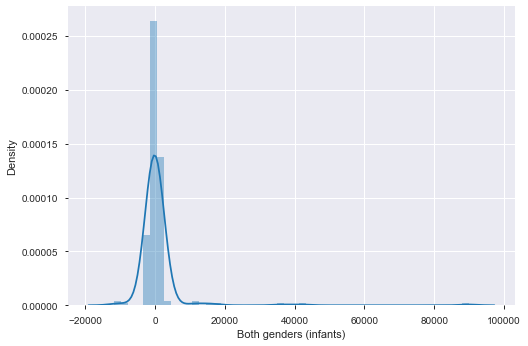

In [63]:
predict(LinearRegression(), 0)

Training score : 0.9788810115107087
predictions are: 
 [353371.65  31730.65  35895.27  32167.99  30349.56  39654.83  16621.04
  16457.57  34442.26  27385.58  48165.27  36546.9   32172.58  29954.62
  24595.54  13091.4   10915.02  39061.84  26717.45  53661.88  37820.3
  10568.38  47680.85   9010.87  36269.16  31748.85  31130.72  30913.16
  39852.5   38964.37  24060.64  84201.41  79882.66  40330.21   8112.81
  34419.16  24448.35  27662.56  25070.79  23365.73  23244.62  66496.48
  21002.53  45720.73  32727.71  29127.03  28517.9   35977.26 142831.05
  40858.67  30450.43 137748.19  38954.76  48108.24  36910.15  29824.3
  27235.5   47728.38  29186.51  35929.19 138419.51  37961.98  43801.64
  29918.91  35303.73  38294.32  10009.43  27821.39  12885.81  29253.72
  18033.73  20893.5   21753.74  29249.08  30948.59  27586.74  37820.07
  19157.71  18646.66  23550.23  22883.48  30393.22  36978.33  19043.
  44466.11  84248.33  16808.76  33186.84  32421.91  60722.1   26350.99
  45761.08  25771.77 15675

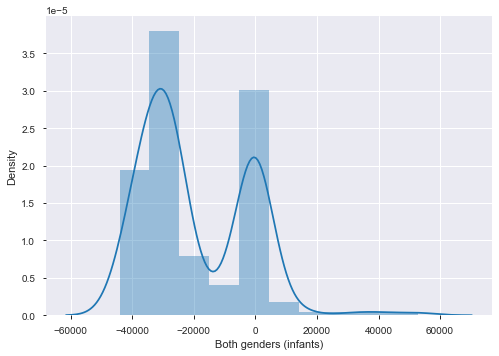

In [64]:
predict(RandomForestRegressor(), 1)

Training score : 1.0
predictions are: 
 [3.58949e+05 6.07000e+02 3.75000e+03 3.00000e+01 3.40000e+01 1.98000e+02
 8.83900e+03 1.69120e+04 3.96000e+02 2.72930e+04 4.87730e+04 7.76000e+02
 4.60000e+01 1.07200e+03 8.00000e+00 1.21450e+04 1.00660e+04 6.81000e+02
 3.83000e+03 5.38860e+04 1.07100e+03 8.75400e+03 4.78750e+04 6.57600e+03
 2.16800e+03 4.03300e+03 7.30000e+01 3.25000e+02 2.27400e+03 7.20000e+01
 2.39490e+04 8.84600e+04 8.05220e+04 2.59000e+02 7.75500e+03 1.17500e+03
 9.00000e+00 3.04000e+02 2.51040e+04 2.39490e+04 2.35960e+04 6.72480e+04
 2.11380e+04 2.56600e+03 3.24430e+04 2.00000e+00 2.91070e+04 3.58300e+04
 1.35673e+05 3.52200e+03 3.90000e+02 1.43044e+05 7.00000e+00 4.84450e+04
 3.41900e+03 2.71000e+02 4.10000e+01 4.85500e+04 1.99000e+02 3.51900e+04
 1.43044e+05 3.83720e+04 1.33700e+03 9.97000e+02 5.33000e+02 7.50000e+01
 9.32500e+03 4.25000e+02 6.55600e+03 2.29000e+02 6.94900e+03 2.04380e+04
 6.55600e+03 1.59500e+03 3.02800e+03 3.60000e+01 1.43100e+03 1.83950e+04
 1.83950e+0

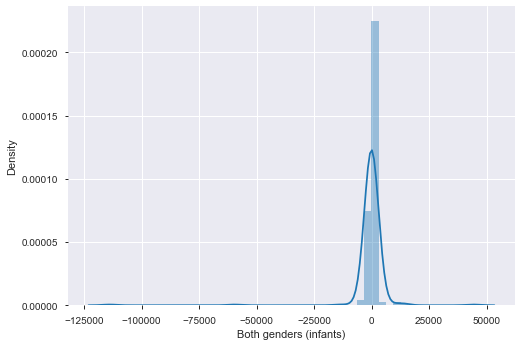

In [65]:
predict(DecisionTreeRegressor(), 0)